## Title :
Model pruning using Lasso regularization

## Description :

The goal of this exercise is to perform model pruning using $L_1$ regularization. Your final visualization plot may look a little something like this:

<img src="../fig/fig1.gif" style="width: 500px;">

**NOTE:** This graph is only a sample. The data will be the same, the model predictions will depend on your regularization parameters.

## Instructions:
- Generate the predictor and response data using the helper code given.
- Split the data into train and test sets.
- Build a simple neural network with 2 hidden layers with 5 neurons each. Add an appropriate $L_1$ regularization to each layer.
- Compile the model with MSE as the loss.
- Fit the model on the training data and use the helper function plot_weights() in order to visualize the non-zero weights after a given set of epochs.
- Adjust the amount of $L_1$ regularization to see how quickly the network weights become zero.

## Hints: 

<a href="https://www.tensorflow.org/api_docs/python/tf/keras/regularizers/L1" target="_blank">tf.keras.regularizers.L1()</a>
A regularizer that applies L1 regularization penalty.

<a href="https://www.tensorflow.org/api_docs/python/tf/keras/Sequential" target="_blank">tf.keras.sequential()</a>
A sequential model is for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

<a href="https://www.tensorflow.org/api_docs/python/tf/keras/optimizers" target="_blank">tf.keras.optimizers()</a>
An optimizer is one of the two arguments required for compiling a Keras model

<a href="https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense" target="_blank">model.add()</a>
Adds layers to the model.

<a href="https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile" target="_blank">model.compile()</a>
Compiles the layers defined into a neural network

<a href="https://www.tensorflow.org/api_docs/python/tf/keras/Model" target="_blank">model.fit()</a>
Fits the data to the neural network

<a href="https://www.tensorflow.org/api_docs/python/tf/keras/Model" target="_blank">model.predict()</a>
Used to predict the values given the model

In [103]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from sklearn.metrics import mean_squared_error
import tensorflow as tf
np.random.seed(0)
tf.random.set_seed(0)
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers, regularizers
from sklearn.model_selection import train_test_split
from helper import plot_weights

In [104]:
# Use the helper code below to generate the data

# Define the number of data points to generate
num_points = 30 

# Generate predictor points (x) between 0 and 5
x = np.linspace(0,5,num_points)

# Generate the response variable (y) using the predictor points
y = x * np.sin(x) + np.random.normal(loc=0, scale=1, size=num_points)

# Split the data into train and test sets with .33 and random_state = 42
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)


In [106]:
print(x_train.shape)
y_train.shape

(20,)


(20,)

In [89]:
### edTest(test_params) ###
# Define a Neural network with L1 regularization
model = Sequential()

# Select the number of nodes in each hidden layer as 5
n_hidden = 5

# Add L1 regularization with value 0.1 regularization value
myl1_reg = regularizers.L1(0.1)

# Add 2 dense hidden layers with n_hidden neurons and use 'tanh' activation. 
# Make sure you use l1 regularization
model.add(Dense(n_hidden, activation = "tanh", kernel_regularizer = myl1_reg, input_shape = (1,1)))
model.add(Dense(n_hidden, activation = "tanh", kernel_regularizer = myl1_reg))

# Add the output layer with one neuron, l1 regularization and 
# 'linear' activation
model.add(Dense(1, activation = "linear", activity_regularizer = myl1_reg))

# Compile the model. Choose a large learning rate such as 0.01
model.compile(loss = "mean_squared_error", metrics=['mse'], optimizer = optimizers.Adam(learning_rate = 0.01)) 

# Check model summary
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 1, 5)              10        
                                                                 
 dense_31 (Dense)            (None, 1, 5)              30        
                                                                 
 dense_32 (Dense)            (None, 1, 1)              6         
                                                                 
Total params: 46 (184.00 Byte)
Trainable params: 46 (184.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### ⏸ Why does `model.summary()` show 46 trainable parameters?

#### A. Model has 25 weights and 21 biases
#### B. Model has 35 weights and 11 biases
#### C. Model has 40 weights and 6 biases
#### D. Model has 30 weights and 16 biases

In [90]:
### edTest(test_chow1) ###

# Submit an answer choice as a string below (eg. if you choose option C, put 'C')
answer1 = 'B'

# Parameters in this layer: Each neuron in the first hidden layer has its own weight for each input feature (1 weight per feature) and a bias term. 
# Therefore, there are (1 input feature * 5 neurons) + 5 biases = 10 parameters in this layer.

In [91]:
model.get_weights()

[array([[-0.42811942,  0.24179912, -0.56214976,  0.77623296, -0.6977608 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.14285696, -0.6789557 ,  0.5132544 , -0.69688964, -0.36517832],
        [-0.67678165, -0.24106437, -0.23091519,  0.5196028 , -0.53145117],
        [-0.20198739,  0.5434718 , -0.73079157,  0.3111341 , -0.740113  ],
        [ 0.51505136, -0.13514423, -0.07982659, -0.66849184, -0.40532663],
        [-0.1158666 , -0.35379717, -0.2608778 , -0.69147354, -0.3330925 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.5099447 ],
        [ 0.13796568],
        [-0.5022328 ],
        [ 0.21022105],
        [-0.34504247]], dtype=float32),
 array([0.], dtype=float32)]

In [92]:
np.array(list(model.get_weights()[0].flatten())*n_hidden).reshape(n_hidden,n_hidden).reshape(n_hidden**2,)

array([-0.42811942,  0.24179912, -0.56214976,  0.77623296, -0.6977608 ,
       -0.42811942,  0.24179912, -0.56214976,  0.77623296, -0.6977608 ,
       -0.42811942,  0.24179912, -0.56214976,  0.77623296, -0.6977608 ,
       -0.42811942,  0.24179912, -0.56214976,  0.77623296, -0.6977608 ,
       -0.42811942,  0.24179912, -0.56214976,  0.77623296, -0.6977608 ],
      dtype=float32)

Epoch 1/50
2/2 [==============================] - 1s 129ms/step - loss: 8.1315 - mse: 6.7959 - val_loss: 4.5329 - val_mse: 3.2119
Epoch 2/50
2/2 [==============================] - 0s 20ms/step - loss: 8.0382 - mse: 6.7144 - val_loss: 4.6974 - val_mse: 3.3774
Epoch 3/50
2/2 [==============================] - 0s 22ms/step - loss: 7.8048 - mse: 6.4866 - val_loss: 4.7381 - val_mse: 3.4267
Epoch 4/50
2/2 [==============================] - 0s 19ms/step - loss: 7.7033 - mse: 6.3925 - val_loss: 4.8355 - val_mse: 3.5304
Epoch 5/50
2/2 [==============================] - 0s 19ms/step - loss: 7.5941 - mse: 6.2901 - val_loss: 4.9260 - val_mse: 3.6286
Epoch 6/50
2/2 [==============================] - 0s 17ms/step - loss: 7.4599 - mse: 6.1636 - val_loss: 4.9859 - val_mse: 3.6987
Epoch 7/50
2/2 [==============================] - 0s 17ms/step - loss: 7.3626 - mse: 6.0759 - val_loss: 5.0496 - val_mse: 3.7734
Epoch 8/50
2/2 [==============================] - 0s 17ms/step - loss: 7.2253 - mse: 5.9496 - va

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
f

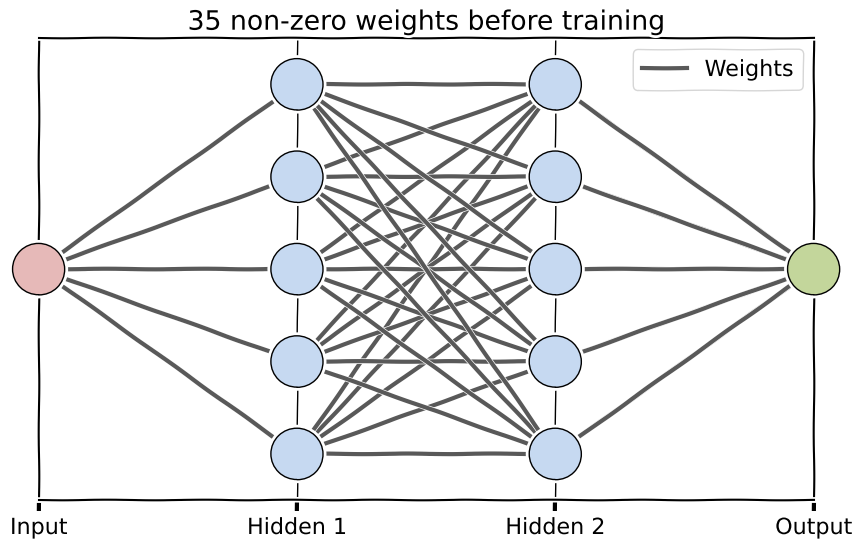

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
f

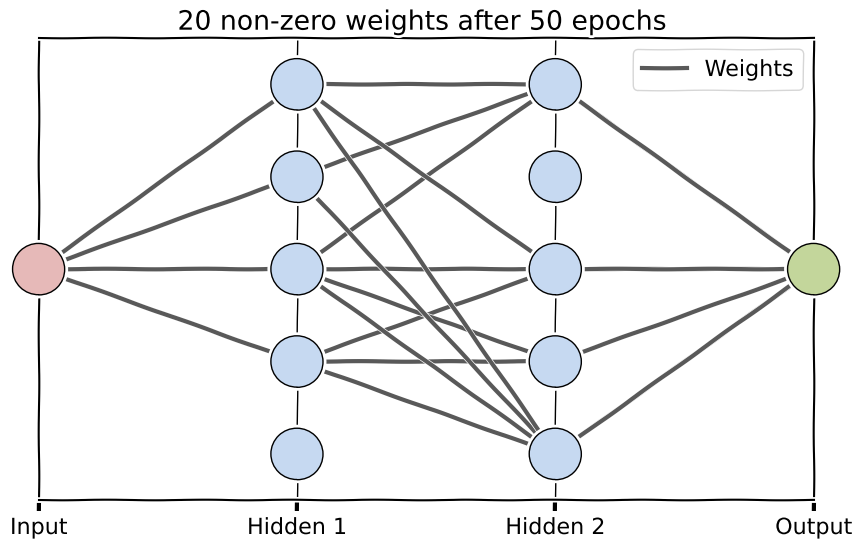

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
f

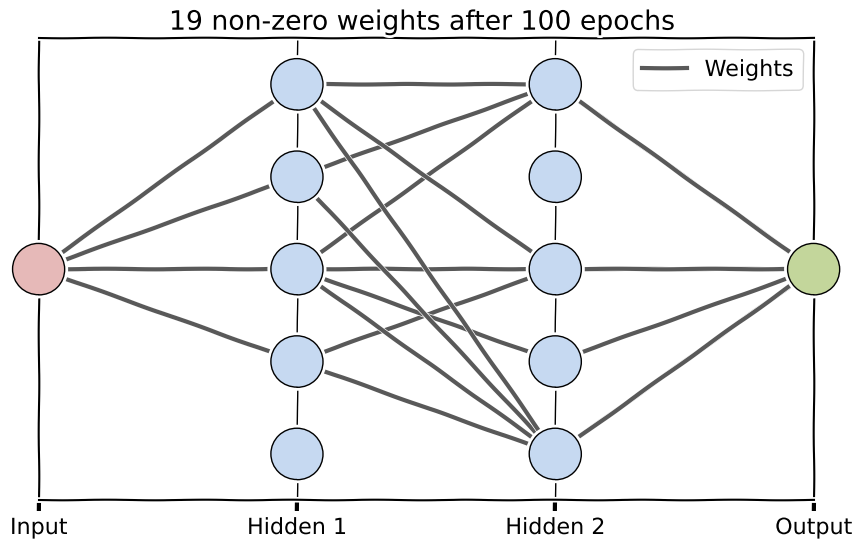

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
f

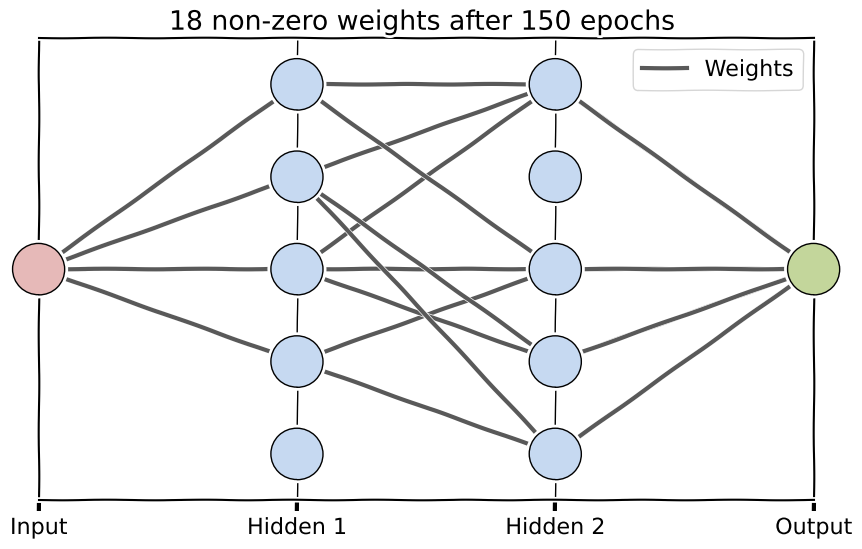

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
f

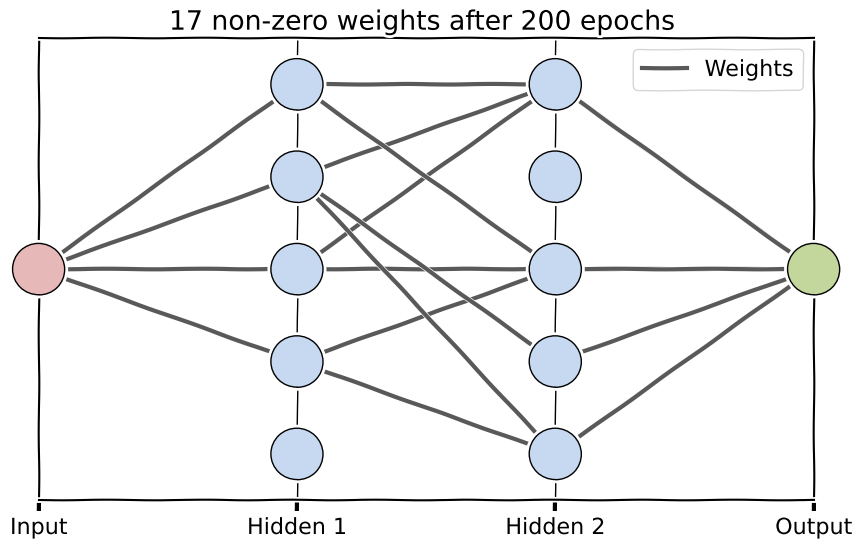

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
f

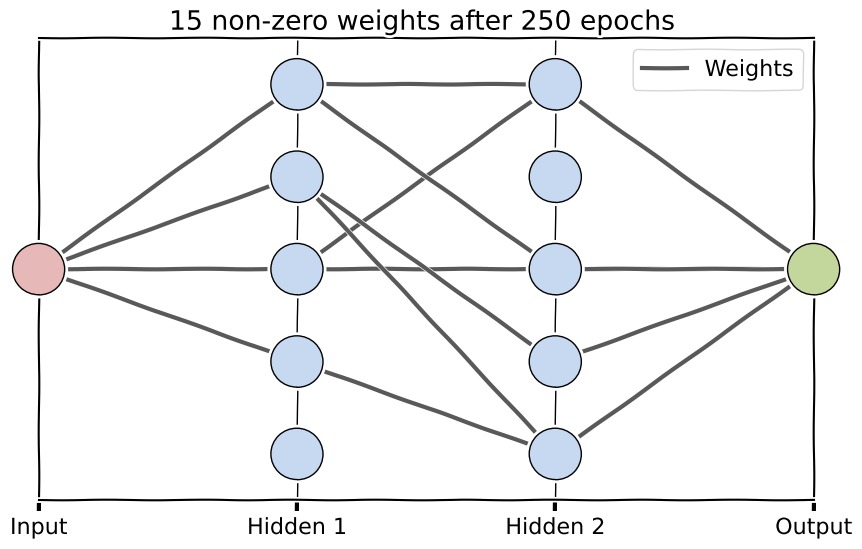

In [95]:
# Use the code below to plot the neural network as we train the model 
for i in range(6): 
    plot_weights(model,epochnum =i*50,n_hidden=n_hidden)         
    model.fit(x_train.reshape(-1,1,), y_train.reshape(-1,1),  validation_split=0.2, epochs=50, batch_size=10, verbose=1)


In [101]:
index = np.argsort(x_train)
x_train = x_train[index]
y_train = y_train[index]

1/1 [==============================] - 0s 76ms/step


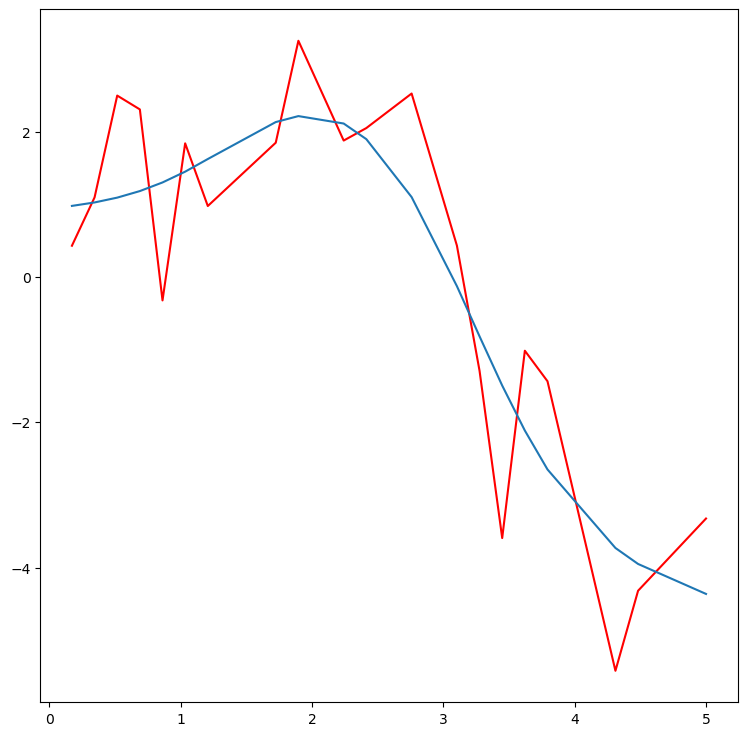

In [102]:
fig,ax = plt.subplots(figsize = (9,9))
ax.plot(x_train, y_train, color = "red")
ax.plot(x_train, model.predict(x_train.reshape(-1,1)).flatten())

### ⏸ Go back and change the amount of $L_1$ regularization. How does it affect the vanishing of weights?

In [96]:
### edTest(test_chow2) ###

# Type your answer within in the quotes given
answer2 = '___'

In [97]:
df = pd.DataFrame({"x":[0,1,2,3,4,5,6,7,8,9], "y": [0,1,2,0,1,2,0,1,2,0], "z":["T","T","T","T","T","T","F","F","F","F"]})

In [98]:
(df["x"]>2)&(df["y"]>0)

0    False
1    False
2    False
3    False
4     True
5     True
6    False
7     True
8     True
9    False
dtype: bool

In [99]:
df

,x,y,z
0,0,0,T
1,1,1,T
2,2,2,T
3,3,0,T
4,4,1,T
5,5,2,T
6,6,0,F
7,7,1,F
8,8,2,F
9,9,0,F


<Axes: >

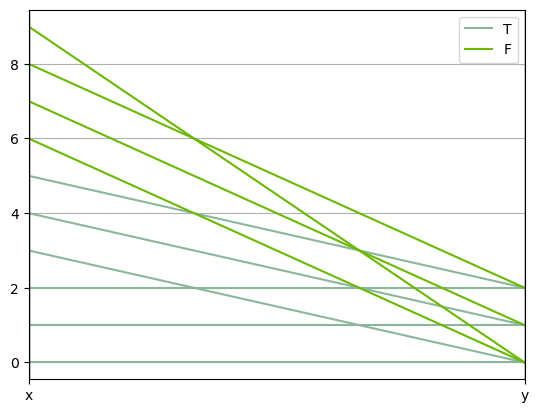

In [100]:
pd.plotting.parallel_coordinates(df, "z")